# Introduction
The code creates a visual representation in the form of a spatial heatmap of the positions from two different datasets. First, it reads two CSV files into two separate Pandas DataFrames and then combines them into a single DataFrame.

Next, the style and size of the plot are set. The spatial heatmap is created as a Kernel Density Estimate (KDE) using the Seaborn library. It uses the X and Z positions of the data and selects the "YlOrBr" (Yellow-Orange-Brown) color palette. The heatmap is displayed as a filled contour plot, and the kernel bandwidth is adjusted.

After that, labels for the X and Y axes are added, and the axis limits are set. Additionally, a horizontal and a vertical line are drawn in the middle of the plot in blue color to mark the center of the field. Black lines are also drawn to represent the goals on both sides of the field.

A legend is added to explain the different lines, with its background transparency reduced. Finally, the top and right spines of the plot are removed to create a clean appearance. In the end, the created spatial heatmap is displayed.

# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constants

In [12]:
# Subdirectory that contains the CSV files with the positions from unity to be plotted
CSV_PATH = r"C:\repos\positions"

# Heatmap plotting
This notebook plots a heatmap of the position of Airhockey objects. To save the position data of an object to csv it needs to be configured in the PositionLogger in the Airhockey Unity project. The Logger will save the csv to *configuredPath*/*gameObjectName*_position_data.csv. Every object data that should be plotted needs to be read into a pandas dataframe and concatenated into the 'data' dataframe. The 'data' dataframe is then used to plot the heatmap. 

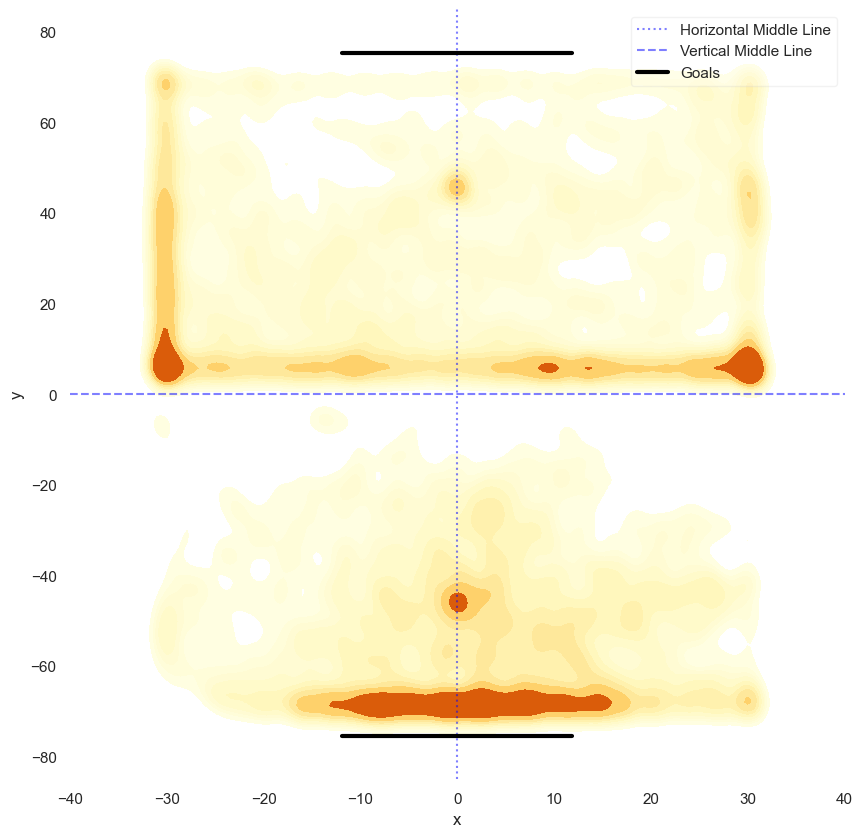

In [11]:
# Read the CSV file into a pandas DataFrame
data1 = pd.read_csv(f"{CSV_PATH}\PusherAgent_position_data.csv")
# Read second CSV file into a pandas DataFrame
data2 = pd.read_csv(f"{CSV_PATH}\PusherHumanSelfplay_position_data.csv")
# Concatenate the two dataframes
data = pd.concat([data1, data2], ignore_index=True)

# Set plot style and size
sns.set(style="white")
plt.figure(figsize=(10, 10))

# Create the spatial heatmap (KDE plot) using seaborn
ax = sns.kdeplot(
    x=data["PosX"],
    y=data["PosZ"],
    cmap="YlOrBr",
    fill=True,  # Fill the contour plot
    bw_adjust=0.25,  # Adjust the bandwidth of the kernel
    cbar=False,  # Display a colorbar
)

# Set x and y-axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")

# Set axis limits
ax.set_xlim(-40, 40)
ax.set_ylim(-85, 85)

# Add middle lines
ax.axvline(0, color="blue", linestyle="dotted", alpha=0.5, label="Horizontal Middle Line")
ax.axhline(0, color="blue", linestyle="--", alpha=0.5, label="Vertical Middle Line")

# Add goals
ax.axhline(-75.4, xmin=0.3514, xmax=0.6486, color="black", linestyle="-", linewidth=3, alpha=1, label="Goals")
ax.axhline(75.4, xmin=0.3514, xmax=0.6486, color="black", linestyle="-", linewidth=3, alpha=1)

# Add legend
ax.legend(framealpha=0.25)

# Remove the top and right spines
sns.despine(left=True, bottom=True)

# Display the spatial heatmap
plt.show()